## Kontingenzkoeffizient
----------------------------------------

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

Der **Kontingenzkoeffizient** $C$ ist ein $\chi ^2$-basiertes Maß für die Assoziation von kategorialen Daten. Er stützt sich auf den <a href="https://en.wikipedia.org/wiki/Chi-squared_test">$\chi ^2$-Test auf Unabhängigkeit</a>. Die $\chi ^2$ Statistik ermöglicht es zu beurteilen, ob eine statistische Beziehung zwischen den Variablen in den <a href="https://en.wikipedia.org/wiki/Contingency_table">Kontingenztabellen</a> (auch bekannt als Kontingenztafeln oder Kreuztabellen) besteht oder nicht. In dieser Art von Tabellen wird die Verteilung der Variablen in einem Matrixformat dargestellt.

Für die Berechnung des **Kontingenzkoeffizienten** $C$
zu berechnen, müssen wir die $\chi ^2$-Statistik im Voraus bestimmen.

### Berechnung der $\chi ^2$-Statistik

Die $\chi ^2$-Statistik ist gegeben durch
$$\chi^2= \sum{\frac{(O-E)^2}{E}}\text{,}$$

wobei $O$ für die beobachtete Häufigkeit und $E$ für die erwartete Häufigkeit steht. Bitte beachten Sie, dass $\frac{(O-E)^2}{E}$ für jede Zelle ausgewertet und dann aufsummiert wird.

Anhand eines Beispiels soll die Berechnung der $\chi ^2$-Statistik auf der Grundlage kategorialer Beobachtungsdaten näher erläutert werden. Nehmen wir eine Prüfung am Ende des Semesters. Es gibt drei Gruppen von Studierenden: Die Studierenden haben entweder bestanden, nicht bestanden oder nicht an der Prüfung teilgenommen. Außerdem wird die Anzahl der Übungen, die jeder einzelne Studierende während des Semesters absolviert hat, in vier Gruppen eingeteilt: Keine, weniger als die Hälfte $(\lt 0.5)$, mehr als die Hälfte $(\ge 0.5)$, alle.

Die resultierende Kontingenztabelle sieht wie folgt aus:

\begin{array}{l|ccc}
\hline
\  & \text{Keine} & <0.5 & > 0.5 & \text{Alle}  \\
\hline
\ \text{erfolgreich} & 12  & 13 & 24  & 14  \\
\ \text{nicht erfolgreich} & 22  &  11 & 8 & 6  \\
\ \text{nicht teilgenommen} & 11  & 14 & 6 & 7  \\
\hline 
\end{array}

Zunächst konstruieren wir ein `dataframe` Objekt und geben ihm den Namen `obs`, um uns daran zu erinnern, dass diese Daten der beobachteten Häufigkeit entsprechen:

In [19]:
# Erzeuge neues Dataframe obs
col1 = ['erfolgreich','nicht erfolgreich','nicht teilgenommen']
col2 = [12,22,11]
col3 = [13,11,14]
col4 = [24,8,6]
col5 = [14,6,7]

obs = pd.DataFrame({'Keine':col2,'<0.5':col3,'>0.5':col4,'Alle':col5}, index = col1)
obs

,Keine,<0.5,>0.5,Alle
erfolgreich,12,13,24,14
nicht erfolgreich,22,11,8,6
nicht teilgenommen,11,14,6,7


Perfekt, jetzt haben wir eine ordentliche Darstellung unserer Daten in Python. Allerdings fehlt noch ein Teil, um eine Kontingenztabelle zu vervollständigen. Die Zeilensummen und Spaltensummen.

Es gibt mehrere Möglichkeiten, die Zeilen- und Spaltensummen in Python zu berechnen. Unter anderem kann man die Funktion `sum(df, axis=0,1)` verwenden. Die Funktion benötigt zwei Argumente, die Daten und eine Zahl, die angibt, ob die Daten zeilen- oder spaltenweise vorliegen.

In [25]:
# Erzeuge Dataframe obs_sum ohne labels
obs_sum = pd.DataFrame({'None':col2,'<0.5':col3,'>0.5':col4,'all':col5})

# Berechne Zeilen/Spaltensumme
columnsum=obs.sum(axis=0)
rowsum=obs.sum(axis=1)

print('Spaltensummen :',columnsum.values)
print('Zeilensummen :',rowsum.values)

Spaltensummen : [45 38 38 27]
Zeilensummen : [63 47 38]


Setzt man alle Teile zusammen, sieht die Kontingenztabelle wie folgt aus:

\begin{array}{l|cccc|c}
\hline
\  & \text{Keine} & <0.5 & > 0.5 & \text{Alle}  & \text{Zeilensumme} \\
\hline
\ \text{erfolgreich} & 12  & 13 & 24  & 14 & 63\\
\ \text{nicht erfolgreich} & 22  &  11 & 8 & 6 & 47\\
\ \text{nicht teilgenommen} & 11  & 14 & 6 & 7 & 38\\
\hline 
\ \text{Spaltensumme} & 45  & 38 & 38 & 27 & \\
\end{array}

Toll, jetzt haben wir eine Tabelle mit den beobachteten Häufigkeiten. Im nächsten Schritt berechnen wir die erwarteten Häufigkeiten. Um die erwarteten Häufigkeiten $(E)$ zu berechnen, wenden wir diese Gleichung an:

$$E = \frac{R\times C}{n} \text{,}$$

wobei $R$ die Zeilensumme, $C$ die Spaltensumme und $n$ der Stichprobenumfang ist. Bitte beachten Sie, dass wir die erwartete Häufigkeit für jeden einzelnen Tabelleneintrag berechnen müssen, d. h. wir müssen $3 \times 4=12$ Berechnungen durchführen. Auch hier bietet Python mehrere Möglichkeiten, diese Aufgabe zu lösen. Man kann eine verschachtelte for-Schleife bauen, um jede Zelle zu durchlaufen und die Berechnungen schrittweise durchzuführen, das ist definitiv in Ordnung! Wir können aber auch die vektorisierte und damit viel schnellere Funktion `outer()` in Kombination mit der Funktion `sum()` verwenden. Wir weisen das Ergebnis einer Variablen mit der Bezeichnung `exp` zu, um uns daran zu erinnern, dass diese Tabelle den erwarteten Häufigkeiten entspricht.

In [26]:
# Berechne die Stichprobengrösse
all_sum = sum(columnsum)

# Bilde das Vektorprodukt
exp = np.outer(columnsum,rowsum)/all_sum

# Transponiere Vektoren
exp = exp.transpose()

# Erzeuge DataFrame
exp_table = pd.DataFrame(exp, columns = ['Keine','<0.5','>0.5','Alle'])
exp_table.insert(0, "' '", ['erfolgreich','nicht erfolgreich','nicht teilgenommen'], True)

# print dataframe frequencies_t_df
exp_table

,' ',Keine,<0.5,>0.5,Alle
0,erfolgreich,19.155405,16.175676,16.175676,11.493243
1,nicht erfolgreich,14.290541,12.067568,12.067568,8.574324
2,nicht teilgenommen,11.554054,9.756757,9.756757,6.932432


Im nächsten Schritt berechnen wir schließlich die $\chi ^2$-Statistik. Erinnern Sie sich an die Gleichung:

$$\chi^2= \sum{\frac{(O-E)^2}{E}}\text{,}$$

wobei $O$ für die beobachtete Häufigkeit und $E$ für die erwartete Häufigkeit steht.

In [27]:
# Berechne chisqVal
chisqVal=np.sum(((obs_sum.values-exp)**2)/exp)
chisqVal

17.344387665138406

Die $\chi ^2$-Statistik ergibt $17,3443877$.

Bevor wir schließlich den Kontingenzkoeffizienten berechnen, gibt es in Python eine nette Plot-Funktion zur Visualisierung kategorischer Daten. Die Funktion `mosaicplot()` visualisiert Kontingenztabellen und hilft bei der Beurteilung der Verteilungen der Daten und möglicher Abhängigkeiten.

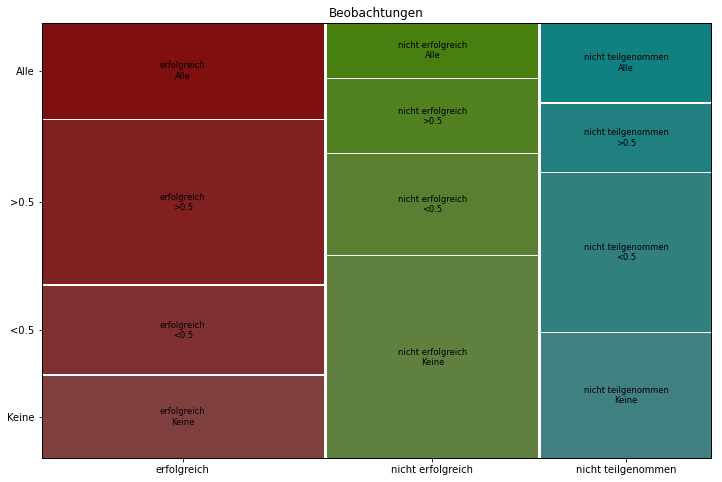

In [28]:
# Erzeuge Daten für Mosaikplot aus Kontingenztabelle
data = {('erfolgreich','Keine'): 12,('erfolgreich','<0.5'): 13,('erfolgreich','>0.5'): 24,('erfolgreich','Alle'): 14,
       ('nicht erfolgreich','Keine'): 22,('nicht erfolgreich','<0.5'): 11,('nicht erfolgreich','>0.5'): 8,('nicht erfolgreich','Alle'): 6,
       ('nicht teilgenommen','Keine'): 11,('nicht teilgenommen','<0.5'): 14,('nicht teilgenommen','>0.5'): 6,('nicht teilgenommen','Alle'): 7}


#figure(, dpi=160)
fig,ax=plt.subplots(figsize=(12, 8))
_=mosaic(data, title='Beobachtungen',ax=ax)

### Berechnung des Kontingenzkoeffizienten $C$

Der Kontingenzkoeffizient, bezeichnet als $C^∗$, passt die $\chi ^2$-Statistik um den Stichprobenumfang $(n)$ an. Er kann wie folgt geschrieben werden

$$ C^*=\sqrt{\frac{\chi^2}{n+\chi^2}}\text{,} $$

wobei $\chi ^2$ der $\chi ^2$-Statistik entspricht und n die Anzahl der Beobachtungen bezeichnet. Wenn keine Beziehung zwischen zwei Variablen besteht, ist $C^∗=0$. Der Kontingenzkoeffizient $C^∗$ kann Werte $\gt 1$ nicht überschreiten, aber der Kontingenzkoeffizient kann kleiner als $1$ sein, selbst wenn zwei Variablen perfekt miteinander verbunden sind. Dies ist nicht so wünschenswert, daher wird $C^∗$ so angepasst, dass er maximal $1$ erreicht, wenn in einer Tabelle mit einer beliebigen Anzahl von Zeilen und Spalten ein vollständiger Zusammenhang besteht. Daher berechnen wir $C^{∗}_{max}$, das ist

$$ C^*_{max}=\sqrt{\frac{k-1}{k}}\text{,} $$

wobei $k$ die Anzahl der Zeilen oder die Anzahl der Spalten ist, je nachdem, welcher Wert kleiner ist, $k=min(\text{Zeilen,Spalten})$. Dann wird der bereinigte Kontingenzkoeffizient wie folgt berechnet

$$ C=\frac{C^*}{C^*_{max}}=\sqrt\frac{k \cdot \chi^2}{(k-1)(n+\chi^2)} $$

Im obigen Abschnitt wurde die $\chi ^2$-Statistik der Variablen `chisqVal` zugeordnet und als $17,3443877$ berechnet. Nun setzen wir diesen Wert in die Gleichung für den Kontingenzkoeffizienten $C^∗$ ein.

In [29]:
C_star = np.sqrt(chisqVal/(sum(columnsum)+chisqVal))
C_star

0.3238804670641156

Der Kontingenzkoeffizient $C^∗$ beläuft sich auf $0,3238805$.

Nun wenden wir die Gleichung für den bereinigten Kontingenzkoeffizienten, $C$.

In [30]:
k = [obs_sum.shape[0],obs_sum.shape[1]]
k = min(k)
k

3

In [31]:
C_star_max = np.sqrt((k-1)/k)
C = C_star/C_star_max
C

0.39667094098068806

Der bereinigte Kontingenzkoeffizient $C$ wird mit $0,3966709$ bewertet. Zur Erinnerung: Der Kontingenzkoeffizient reicht von $0$ bis $1$. Ein Kontingenzkoeffizient von $0,4$ deutet nicht auf einen starken Zusammenhang zwischen den Prüfungsergebnissen und der Bereitschaft der Studierenden hin, die Übungen während des Semesters zu bearbeiten.